## Exploratory Analysis using Jupyter Notebook

Notebooks for exploratory analysis are standard in the industry. A Jupyter Notebook provides you a Python3 REPL and the ability to display charts and graphs in-line. GitHub also understands how to show .ipynb files correctly.

Pandas is another industry standard for data analysis. We can import it and use it to read data from our s3 bucket on AWS.

In [1]:
import pandas as pd

In [2]:
import s3fs
s3 = s3fs.S3FileSystem(anon=True)
s3.ls('twde-datalab/raw')

s3.get('twde-datalab/raw/quito_stores_sample2016-2017.csv', 
       '../data/quito_stores_sample2016-2017.csv')

#### Read from local csv file to a pandas DataFrame, an incredibly powerful object

In [3]:
data = pd.read_csv('../data/quito_stores_sample2016-2017.csv')

#### Before anything else, let's look at a small slice of the data to see what we're working with

In [4]:
data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,cluster
0,88211471,2016-08-16,44,103520,7.0,True,Quito,Pichincha,5
1,88211472,2016-08-16,44,103665,7.0,False,Quito,Pichincha,5
2,88211473,2016-08-16,44,105574,13.0,False,Quito,Pichincha,5
3,88211474,2016-08-16,44,105575,18.0,False,Quito,Pichincha,5
4,88211475,2016-08-16,44,105577,8.0,False,Quito,Pichincha,5


#### With just this glimpse, you can start to fill out your list of assumptions, hypotheses, and questions. Some of mine are:
- Question: What is the span of dates we are provided?
- Question: How many distinct store_nbr values are there?
- Question: How many distinct item_nbr values are there?
- Hypothesis: unit_sales are always positive
- Hypothesis: onpromotion is always either True or False
- Hypothesis: city and state are always going to be Quito and Pichincha
- Hypothesis: cluster is always 5
- Question: What does cluster mean and is it important to know?
- Question: How many records does the data contain?
- Question: What other data files are available?

In [5]:
# Access an entire dataframe column like you would
# the value in a python dictionary:
# (The returned object has similar pandas built-in 
# functions, like 'head' and 'max')
print(data['date'].max())
print(data['date'].min())

2017-08-15
2016-08-16


In [6]:
# Dataframe columns also have a 'unique' method,
# which can answer several of our questions from above
data['store_nbr'].unique()

array([44, 45, 46, 47, 48, 49])

In [7]:
print(data['item_nbr'].unique())
print("There are too many item numbers to display, so let's just count them:")
print("There are {} different item_nbr values in our data"
          .format(len(data['item_nbr'].unique())))

[ 103520  103665  105574 ..., 2011468 2011448 2123839]
There are too many item numbers to display, so let's just count them:
There are 3717 different item_nbr values in our data


#### It might be helpful to know the 'shape' of our data. We could count by hand (for now) the columns, but how many rows do we have altogether?

In [8]:
print(data.shape)
print("There are {} rows and {} columns in our data".format(data.shape[0], data.shape[1]))

(5877318, 9)
There are 5877318 rows and 9 columns in our data


#### Moving along to answer our intial questions... Let's have a look at unit_sales. Keep in mind that unit sales is the variable we want to predict with our science.

Each row in our data is essentially telling us a `unit_sales` number for a given `item_nbr` at a given `store_nbr` on a given `date`. That is, "how many of an item was sold at a store on a day".

In [9]:
# the .describe() function often ends up using scientific notation,
# but we'll be fine just using 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format

In [10]:
data.unit_sales.describe()

count   5,877,318.00
mean           13.85
std            30.87
min          -290.00
25%             3.00
50%             7.00
75%            14.00
max         6,932.00
Name: unit_sales, dtype: float64

### There are some strange things here.
My list of questions and assumptions is definitely changing given this description:

- Question: What does a negative sale mean?
  - (Answer: negative sales mean returns in this data)
- Question: How often are sales negative?
- Question: How many times are sales above 5,000?
- Question: How do the unit_sales numbers vary with the `date` column?


#### A good way to answer these questions is with some visualizations.

It might be difficult to get an intuitive feel of the data by knowing the exact answer to many of those questions. What we actually want to learn is the personality of the data. We want to know what it looks like in a glance.

### Let's import the python libraries that do the heavy lifting of data visualization

In [20]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns


and then let's look at a box plot of unit sales. A box plot conveys the mean and the middle 50% of the data, and things outside of that inter-quartile-range are generally considered outliers; errors in the data.

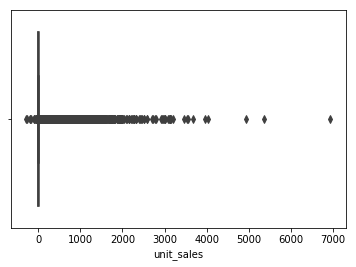

In [32]:
sns.boxplot(data.unit_sales)

This box plot is atrocious. We can't even recognize the inter-quartile-range. *I think it's reasonable to assume there aren't errors in the data, and that these "outliers" are real values. Or else Favorita would have a very big accounting issue to deal with.*

Let's look at the box plot again ignoring the sales of more than, say, 1000. We can make two new data frames and analyze them separately.

In [38]:
outliers = data[data.unit_sales > 1000]

In [39]:
majority_of_data = data[data.unit_sales <= 1000]

and once again look at the boxplot of the non-outlier (for lack of a better term) data

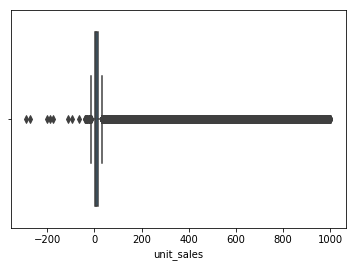

In [40]:
sns.boxplot(majority_of_data.unit_sales)

This is still really hard to see. Let's try a kernel density estimation plot. This will show us the probability of a data point being a certain value. We can see that the likelihood of getting a certain unit_sales value tapers off dramatically and has almost vanished by a unit_sales of 100.

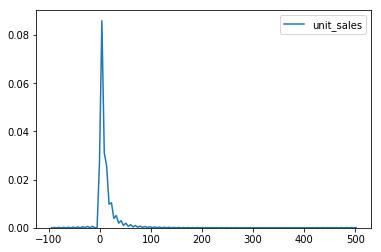

In [47]:
sns.kdeplot(majority_of_data.unit_sales, clip=[-100,500])